In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spectral as spec
import spectral.io.envi as envi
import matplotlib.pyplot as plt
import scipy as sp
import scipy.signal

In [2]:
def pixel_to_wavelength(x, spectral_coeffs):
    if len(spectral_coeffs) == 2:
        w = spectral_coeffs[1] + spectral_coeffs[0]*x
    elif len(spectral_coeffs) == 3:
        w = spectral_coeffs[2] + spectral_coeffs[1]*x + spectral_coeffs[0]*x*x
    elif len(spectral_coeffs) == 4:
        w = spectral_coeffs[3] + spectral_coeffs[2]*x + spectral_coeffs[1]*x*x + spectral_coeffs[0]*x*x*x
    elif len(spectral_coeffs) == 5:
        w = spectral_coeffs[4] + spectral_coeffs[3]*x + spectral_coeffs[2]*x*x + spectral_coeffs[1]*x*x*x + spectral_coeffs[0]*x*x*x*x
    else: 
        print('Please update spectrally_calibrate function to include this polynomial.')
        print('Returning 0.')
        w = 0
    return w

In [3]:
data = envi.open('1665740241.726_e099.8806_g000_1936x0530.hdr')


In [4]:
print(data)
image_height, image_width, _ = data.shape
#print(data.shape)


	Data Source:   './1665740241.726_e099.8806_g000_1936x0530.bip'
	# Rows:            651
	# Samples:         530
	# Bands:          1936
	Interleave:        BIP
	Quantization:  16 bits
	Data format:    uint16


In [5]:
band_r = 960
band_ir = 1270
band_g = 740
band_b = 480

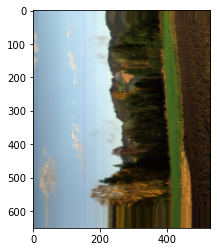

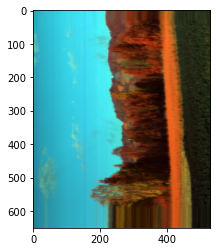

In [6]:
view = spec.imshow(data, bands=(band_r, band_g, band_b))
#spec.save_rgb('normal.jpg', data, bands=(band_r, band_g, band_b))
view = spec.imshow(data, bands=(band_ir, band_g, band_b))
#spec.save_rgb('chlorophyll.jpg', data, bands=(band_ir, band_g, band_b))



(1936,)
(1936,)


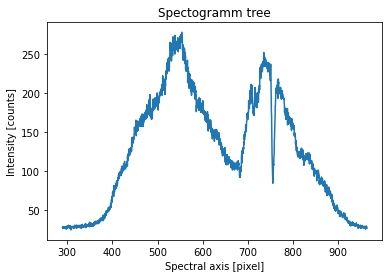

In [7]:
im = data[300,350,:]
im =im[0][0]
fig, ax = plt.subplots()
x = np.linspace(0,1936,1936)
#−1.1642e−5x2 +3.7627e−1x+2.8974e+2
spectral_coeffs = [-0.000014652,0.37627,289.74]
w = pixel_to_wavelength(x, spectral_coeffs)
plt.plot(w,im)
plt.title('Spectogramm tree')
plt.xlabel('Spectral axis [pixel]')
plt.ylabel('Intensity [counts]')
print(w.shape)
print(im.shape)

Text(0, 0.5, 'Intensity [counts]')

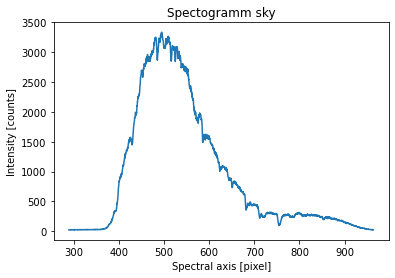

In [8]:
im = data[300,100,:]
im =im[0][0]
fig, ax = plt.subplots()
plt.plot(w,im)

plt.title('Spectogramm sky')
plt.xlabel('Spectral axis [pixel]')
plt.ylabel('Intensity [counts]')

Text(0, 0.5, 'Intensity [counts]')

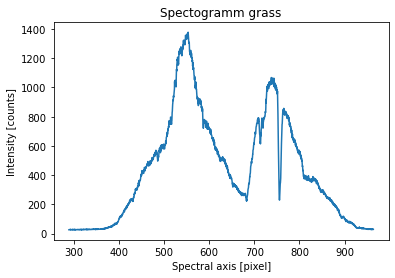

In [9]:
im = data[300,430,:]
im =im[0][0]
spec = np.array([im , ])
fig, ax = plt.subplots()
plt.plot(w,im)

plt.title('Spectogramm grass')
plt.xlabel('Spectral axis [pixel]')
plt.ylabel('Intensity [counts]')

Text(0, 0.5, 'Intensity [counts]')

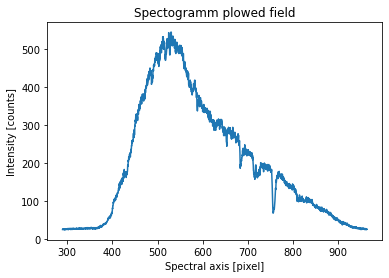

In [10]:
im = data[300,500,:]
im =im[0][0]
spec = np.array([im , ])
fig, ax = plt.subplots()
plt.plot(w,im)

plt.title('Spectogramm plowed field')
plt.xlabel('Spectral axis [pixel]')
plt.ylabel('Intensity [counts]')


In [11]:
print(data[300,500:505,:][0][0:5])

[[25 27 26 ... 25 27 26]
 [26 26 26 ... 25 26 25]
 [25 27 27 ... 27 26 29]
 [26 27 26 ... 27 26 26]
 [25 25 27 ... 27 27 27]]
